In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

y = titanic_data.Survived

X = pd.get_dummies(X)

X = X.fillna({'Age': X.Age.median()})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [3]:
clf_rf = RandomForestClassifier()

In [4]:
parameters = {'n_estimators': range(10, 100, 10), 'max_depth': range(2, 20)}

In [5]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [6]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20),
                         'n_estimators': range(10, 100, 10)})

In [7]:
grid_search_cv_clf.best_params_

{'max_depth': 4, 'n_estimators': 40}

In [8]:
best_clf = grid_search_cv_clf.best_estimator_

In [9]:
best_clf.score(X_test, y_test)

0.8305084745762712

In [10]:
best_clf.feature_importances_

array([0.15077511, 0.08082924, 0.03534819, 0.03121139, 0.08357302,
       0.33700592, 0.23340533, 0.0215057 , 0.00295095, 0.02339516])

In [11]:
feature_importances = best_clf.feature_importances_

In [33]:
feature_importances_df = pd.DataFrame({'features': X_train.columns,
                                       'feature_importances': feature_importances})

In [34]:
feature_importances_df

,features,feature_importances
0,Pclass,0.150775
1,Age,0.080829
2,SibSp,0.035348
3,Parch,0.031211
4,Fare,0.083573
5,Sex_female,0.337006
6,Sex_male,0.233405
7,Embarked_C,0.021506
8,Embarked_Q,0.002951
9,Embarked_S,0.023395


In [35]:
feature_importances_df = feature_importances_df.sort_values('feature_importances', ascending=False)

In [36]:
feature_importances_df

,features,feature_importances
5,Sex_female,0.337006
6,Sex_male,0.233405
0,Pclass,0.150775
4,Fare,0.083573
1,Age,0.080829
2,SibSp,0.035348
3,Parch,0.031211
9,Embarked_S,0.023395
7,Embarked_C,0.021506
8,Embarked_Q,0.002951


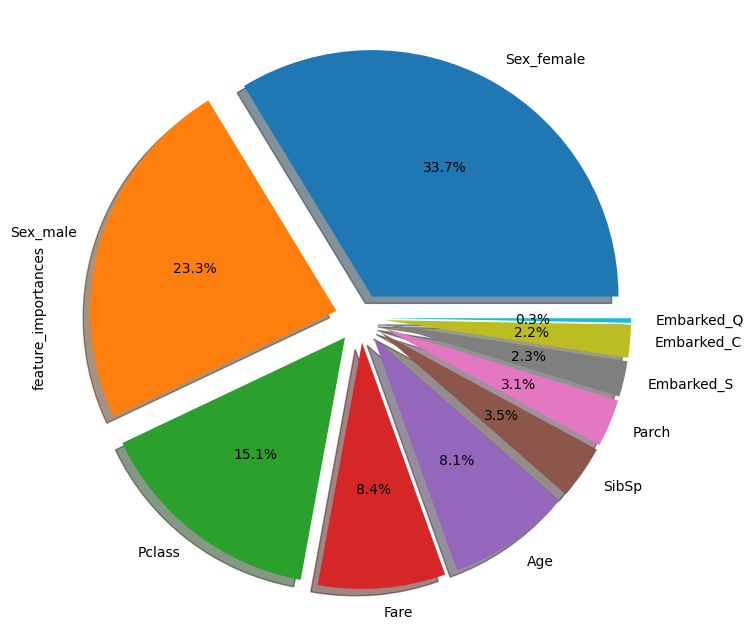

In [37]:
feature_importances_df.plot.pie(explode=[0.1]*len(X_train.columns),
                                labels=feature_importances_df.features,
                                y='feature_importances',
                                autopct='%1.1f%%',
                                shadow=True,
                                legend=False,
                                figsize=(8, 8));

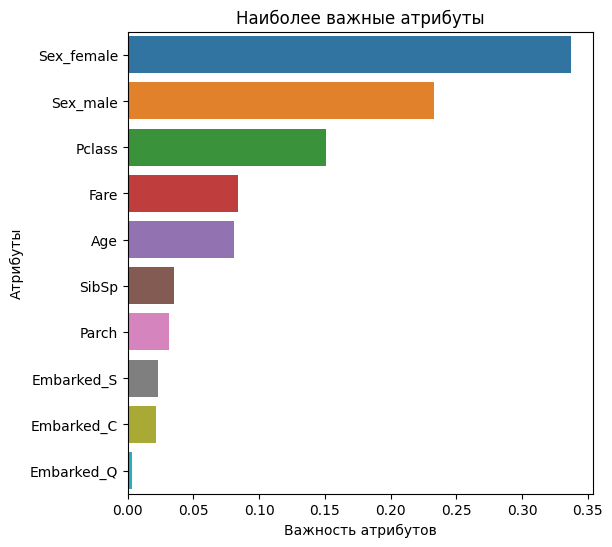

In [38]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=feature_importances_df.features, x=feature_importances_df['feature_importances'])

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title('Наиболее важные атрибуты')
plt.show()